In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

d = pd.read_csv('aggregation/analysis_df_10232024.csv')

# basic exploratory analysis

In [19]:
pd.set_option('display.max_columns', 500)
d['p_y_percentile'] = d['p_y'].rank(pct=True) * 100
d['confirmed_flooded_image'] = d['at_least_one_positive_image_by_area_if_you_have_100_images'] == 1

d['white_frac'] = d['nhl_white_alone'] / d['total_population'] 
d['black_frac'] = d['nhl_black_alone'] / d['total_population']
d['hispanic_frac'] = d['hispanic_alone'] / d['total_population']
d['asian_frac'] = d['nhl_asian_alone'] / d['total_population']

d.head()


,BoroName,BoroCT2020,NTAName,CDTANAME,PUMA,NTA2020,CDTA2020,n_total,n_classified_positive,n_tp,n_fp,n_tn,n_fn,total_not_annotated,positives_not_annotated,negatives_not_annotated,p_y,p_y_CI_lower,p_y_CI_upper,at_least_one_positive_image_by_area,at_least_one_positive_image_by_area_CI_lower,at_least_one_positive_image_by_area_CI_upper,empirical_estimate,at_least_one_positive_image_by_area_if_you_have_100_images,at_least_one_positive_image_by_area_if_you_have_100_images_CI_lower,at_least_one_positive_image_by_area_if_you_have_100_images_CI_upper,n_images_by_area,total_population,nhl_white_alone,nhl_black_alone,hispanic_alone,nhl_asian_alone,num_households_with_internet,num_households_with_smartphone,median_household_income,num_high_school_graduates,num_bachelors_degree,num_graduate_degree,num_limited_english_speaking_households,ft_elevation_min,ft_elevation_max,ft_elevation_mean,area,n_floodnet_sensors,dep_moderate_1_area,dep_moderate_2_area,dep_moderate_1_frac,dep_moderate_2_frac,p_y_percentile,confirmed_flooded_image,white_frac,black_frac,hispanic_frac,asian_frac
0,Manhattan,1000100,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),4121,MN0191,MN01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004357,0.000315,0.019329,0.000000,0.000000,0.000000,NaN,0.288467,0.030997,0.857979,0,0,0,0,0,0,0,0,-666666666,0,0,0,0,0.0,19.0,8.153329,1.844263e+06,0.0,0.000000,0.000000,0.000000,0.000000,94.886119,False,NaN,NaN,NaN,NaN
1,Manhattan,1000201,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,MN0301,MN03,320.0,0.0,0.0,0.0,0.0,0.0,320.0,0.0,320.0,0.002747,0.000933,0.006329,0.548568,0.258224,0.868888,0.000000,0.233284,0.089122,0.470015,320,2666,238,216,1747,400,726,740,45582,324,120,130,155,0.0,37.0,10.417681,1.887579e+06,0.0,0.000000,0.000000,0.000000,0.000000,59.045982,False,0.089272,0.081020,0.655289,0.150038
2,Manhattan,1000600,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,MN0301,MN03,845.0,2.0,1.0,0.0,1.0,0.0,843.0,1.0,843.0,0.003491,0.001280,0.007621,1.000000,1.000000,1.000000,0.002367,1.000000,1.000000,1.000000,845,10751,859,654,3301,5567,3792,3773,25655,2074,1559,268,1777,0.0,41.0,10.160654,4.429417e+06,0.0,22123.784802,6619.532228,0.004995,0.001494,89.428449,True,0.079900,0.060832,0.307041,0.517812
3,Manhattan,1001401,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,MN0302,MN03,182.0,0.0,0.0,0.0,0.0,0.0,182.0,0.0,182.0,0.002494,0.000954,0.005331,0.352224,0.159450,0.622002,0.000000,0.216004,0.091026,0.414063,182,3165,2224,85,314,251,1300,1287,89873,310,867,863,111,24.0,43.0,34.847163,1.006117e+06,0.0,0.000000,0.000000,0.000000,0.000000,24.967770,False,0.702686,0.026856,0.099210,0.079305
4,Manhattan,1001402,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,MN0302,MN03,771.0,0.0,0.0,0.0,1.0,0.0,770.0,0.0,771.0,0.002184,0.000753,0.005009,0.758596,0.440340,0.979171,0.000000,0.191671,0.072518,0.394760,771,3286,881,250,860,1099,1335,1452,46615,550,896,300,545,13.0,42.0,27.553037,1.226207e+06,0.0,3811.625691,3627.556477,0.003108,0.002958,5.113881,False,0.268107,0.076080,0.261716,0.334449


In [20]:
d[['dep_moderate_1_area', 'dep_moderate_2_area']].describe()

,dep_moderate_1_area,dep_moderate_2_area
count,2327.000000,2327.000000
mean,33540.009520,17240.313390
std,77920.766203,49156.431065
min,0.000000,0.000000
25%,0.000000,0.000000
50%,5169.673159,0.000000
75%,33635.337057,9690.586180
max,886875.925303,660828.326813


In [21]:
d[['p_y', 'empirical_estimate', 'at_least_one_positive_image_by_area_if_you_have_100_images']].corr(method='spearman')

,p_y,empirical_estimate,at_least_one_positive_image_by_area_if_you_have_100_images
p_y,1.000000,0.291172,0.966592
empirical_estimate,0.291172,1.000000,0.356945
at_least_one_positive_image_by_area_if_you_have_100_images,0.966592,0.356945,1.000000


In [22]:
d[['p_y', 'empirical_estimate', 'at_least_one_positive_image_by_area_if_you_have_100_images']].corr(method='pearson')

,p_y,empirical_estimate,at_least_one_positive_image_by_area_if_you_have_100_images
p_y,1.000000,0.702950,0.424679
empirical_estimate,0.702950,1.000000,0.409214
at_least_one_positive_image_by_area_if_you_have_100_images,0.424679,0.409214,1.000000


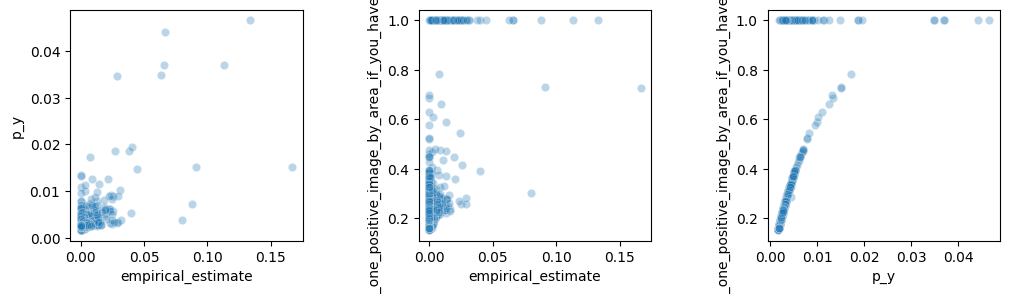

In [23]:
# pairplot of these three using seaborn
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
sns.scatterplot(data=d, x='empirical_estimate', y='p_y', alpha=0.3)
plt.subplot(1, 3, 2)
sns.scatterplot(data=d, x='empirical_estimate', y='at_least_one_positive_image_by_area_if_you_have_100_images', alpha=0.3)
plt.subplot(1, 3, 3)
sns.scatterplot(data=d, x='p_y', y='at_least_one_positive_image_by_area_if_you_have_100_images', alpha=0.3)
plt.subplots_adjust(wspace=0.5)



# 311

### sanity check: all correlations are positive. 

         Current function value: 0.000000
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35


/Users/mattfranchi/miniforge3/envs/sf/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mattfranchi/miniforge3/envs/sf/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mattfranchi/miniforge3/envs/sf/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mattfranchi/miniforge3/envs/sf/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may no

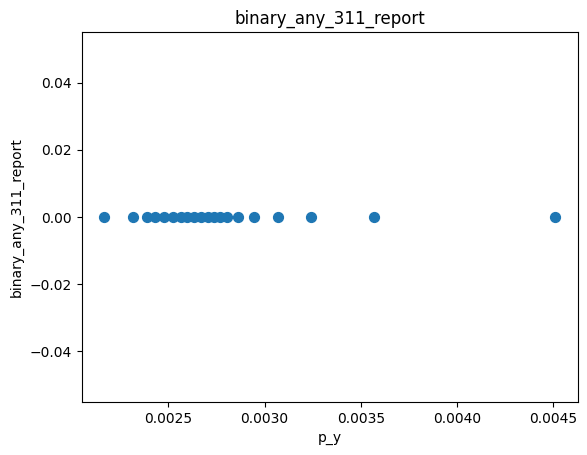

,binary_any_311_report I,binary_any_311_report II
Intercept,-26.3449,-30.0766
,(18368.9059),(335054.4621)
p_y,-0.0488,
,(4894514.7406),
p_y_percentile,,-0.1126
,,(26655.8792)


In [24]:
all_311_models = []
d['any_311_report'] = False
for k in d.columns:
    if '311' in k:
        d['any_311_report'] = d['any_311_report'] | (d[k] > 0) 

for k in d.columns:
    if ('311' in k):
        col_name = ('binary_%s' % k).replace('/', '_')
        d[col_name] = (d[k] > 0) * 1.
        all_311_models.append(sm.Logit.from_formula('%s ~ p_y' % col_name, data = d).fit())
        all_311_models.append(sm.Logit.from_formula('%s ~ p_y_percentile' % col_name, data = d).fit())
        # plot probability of 311 report as function of p_y
        plt.figure()
        sns.regplot(data=d, x='p_y', y=col_name,  x_bins=20, fit_reg=False)
        plt.title(col_name)
        plt.show()
        del d[col_name]
    

summary_col(all_311_models, stars=True)

### still, our model identifies lots of high-risk areas with no 311 reports!

In [25]:
for percentile in [80, 90, 95]:
    print("Fraction of locations at percentile %i or higher of p_y with no 311 report: %2.3f" % (percentile, 1 - d.loc[d['p_y_percentile'] >= percentile, 'any_311_report'].mean()))
    print("Population in these locations: %2.3f" % d.loc[(d['p_y_percentile'] >= percentile) & (d['any_311_report'] == 0), 'total_population'].sum())
print("fraction of locations with confirmed positive image with no 311 report: %2.3f" % (1 - d.loc[d['confirmed_flooded_image'], 'any_311_report'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['confirmed_flooded_image'] == 1) & (d['any_311_report'] == 0), 'total_population'].sum())

Fraction of locations at percentile 80 or higher of p_y with no 311 report: 1.000
Population in these locations: 1681702.000
Fraction of locations at percentile 90 or higher of p_y with no 311 report: 1.000
Population in these locations: 850845.000
Fraction of locations at percentile 95 or higher of p_y with no 311 report: 1.000
Population in these locations: 411019.000
fraction of locations with confirmed positive image with no 311 report: 1.000
Population in these locations: 565255.000


### preliminary estimate of bias (todo: redo this with better measures of race and demographics). 

In [26]:
d['any_311_report'] = d['any_311_report'] * 1.

print("*****WARNING: YOU ARE NOT COMPUTING POPULATION CORRECTLY AT PRESENT****")

race_models = []
for col in ['white_frac', 'black_frac', 'hispanic_frac', 'asian_frac']:
    race_models.append(sm.Logit.from_formula('any_311_report ~ p_y + %s' % col, data = d).fit())
    race_models.append(sm.Logit.from_formula('any_311_report ~ confirmed_flooded_image + %s' % col, data = d).fit())
summary_col(race_models, stars=True)

/Users/mattfranchi/miniforge3/envs/sf/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mattfranchi/miniforge3/envs/sf/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mattfranchi/miniforge3/envs/sf/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mattfranchi/miniforge3/envs/sf/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may no

*****WARNING: YOU ARE NOT COMPUTING POPULATION CORRECTLY AT PRESENT****
         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

# flood risk areas

## TODO: currently I just implemented a pretty sketchy version of flood risk by setting dep_light_3_area > 0.

In [14]:
d['preliminary_measure_of_city_predicted_light_flood_risk'] = (d['dep_light_3_area'] > 0) * 1
d['frac_flooded_above_thres'] = d['dep_moderate_2_frac'] > 0.005
print("fraction of areas with light flood risk using this measure: %2.3f" % d['preliminary_measure_of_city_predicted_light_flood_risk'].mean())
print(sm.Logit.from_formula('preliminary_measure_of_city_predicted_light_flood_risk ~ p_y', data = d).fit().summary())
plt.figure()
sns.regplot(data=d, x='p_y', y='preliminary_measure_of_city_predicted_light_flood_risk',  x_bins=20, fit_reg=False)
plt.show()
    



KeyError: 'dep_light_3_area'

fraction of areas with moderate flood risk using this measure: 0.472
Optimization terminated successfully.
         Current function value: 0.690491
         Iterations 6
                                               Logit Regression Results                                              
Dep. Variable:     preliminary_measure_of_city_predicted_moderate_flood_risk   No. Observations:                 2327
Model:                                                                 Logit   Df Residuals:                     2325
Method:                                                                  MLE   Df Model:                            1
Date:                                                       Thu, 24 Oct 2024   Pseudo R-squ.:                0.001548
Time:                                                               10:24:45   Log-Likelihood:                -1606.8
converged:                                                              True   LL-Null:                       -1609.3
Cov

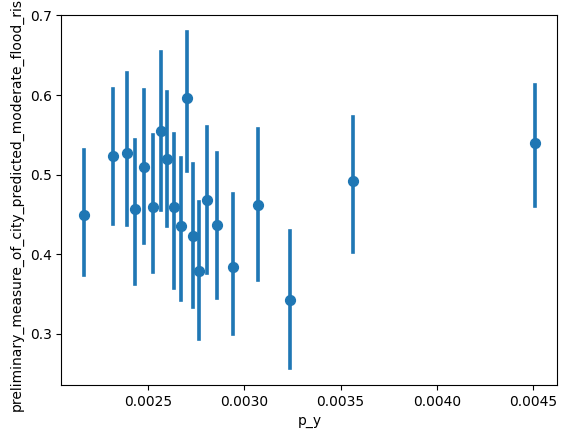

In [15]:
d['preliminary_measure_of_city_predicted_moderate_flood_risk'] = (d['dep_moderate_2_area'] > 0) * 1
print("fraction of areas with moderate flood risk using this measure: %2.3f" % d['preliminary_measure_of_city_predicted_moderate_flood_risk'].mean())
print(sm.Logit.from_formula('preliminary_measure_of_city_predicted_moderate_flood_risk ~ p_y', data = d).fit().summary())
plt.figure()
sns.regplot(data=d, x='p_y', y='preliminary_measure_of_city_predicted_moderate_flood_risk',  x_bins=20, fit_reg=False)
plt.show()
    



# flood sensors

In [17]:
d['any_sensors'] = d['n_floodnet_sensors'] > 0
for percentile in [80, 90, 95]:
    print("Fraction of locations at percentile %i or higher of p_y with no sensors: %2.3f" % (percentile, 1 - d.loc[d['p_y_percentile'] >= percentile, 'any_sensors'].mean()))
    print("Population in these locations: %2.3f" % d.loc[(d['p_y_percentile'] >= percentile) & (d['any_sensors'] == 0), 'total_population'].sum())
print("fraction of locations with confirmed positive image with no sensors: %2.3f" % (1 - d.loc[d['confirmed_flooded_image'], 'any_sensors'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['confirmed_flooded_image'] == 1) & (d['any_sensors'] == 0), 'total_population'].sum())

Fraction of locations at percentile 80 or higher of p_y with no sensors: 0.957
Population in these locations: 1599687.000
Fraction of locations at percentile 90 or higher of p_y with no sensors: 0.944
Population in these locations: 798415.000
Fraction of locations at percentile 95 or higher of p_y with no sensors: 0.915
Population in these locations: 370114.000
fraction of locations with confirmed positive image with no sensors: 0.917
Population in these locations: 505984.000
